# Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Load the data 

The data is from [Kaggle.com](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data).


In [2]:
df=pd.read_csv('Breast Cancer Wisconsin (Diagnostic) Data.csv')
df.head() # first fire rows

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# columns's names
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [4]:
# drop column 'Unnamed: 32'
df=df.drop(columns='Unnamed: 32')

In [13]:
# check missing values
df.isnull().sum()  # there is no missing values

id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
target                     0
dtype: int64

# Attribute Information:

- (1) ID number
- (2) Diagnosis (M = malignant, B = benign)
- (3-32) Ten real-valued features are computed for each cell nucleus:

- - a) radius (mean of distances from center to points on the perimeter)
- - b) texture (standard deviation of gray-scale values)
- - c) perimeter
- - d) area
- - e) smoothness (local variation in radius lengths)
- - f) compactness (perimeter^2 / area - 1.0)
- - g) concavity (severity of concave portions of the contour)
- - h) concave points (number of concave portions of the contour)
- - i) symmetry
- - j) fractal dimension ("coastline approximation" - 1)

`The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.`

`All feature values are recoded with four significant digits.`

`Missing attribute values: none`

`Class distribution: 357 benign, 212 malignant`

# Exploratory Data Analysis (EDA)

##  Statistical description


In [5]:
df.describe(include='all')

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.037183e+07,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080


In [6]:
len(df.columns) 

32

## Distribution

In [7]:
# catogorical column - Diagnosis (M = malignant =1 , B = benign=0)
df['target']=df['diagnosis'].map({"M":1,"B":0})

In [8]:
# Drop diagnosis column
df.drop(columns='diagnosis',inplace=True)

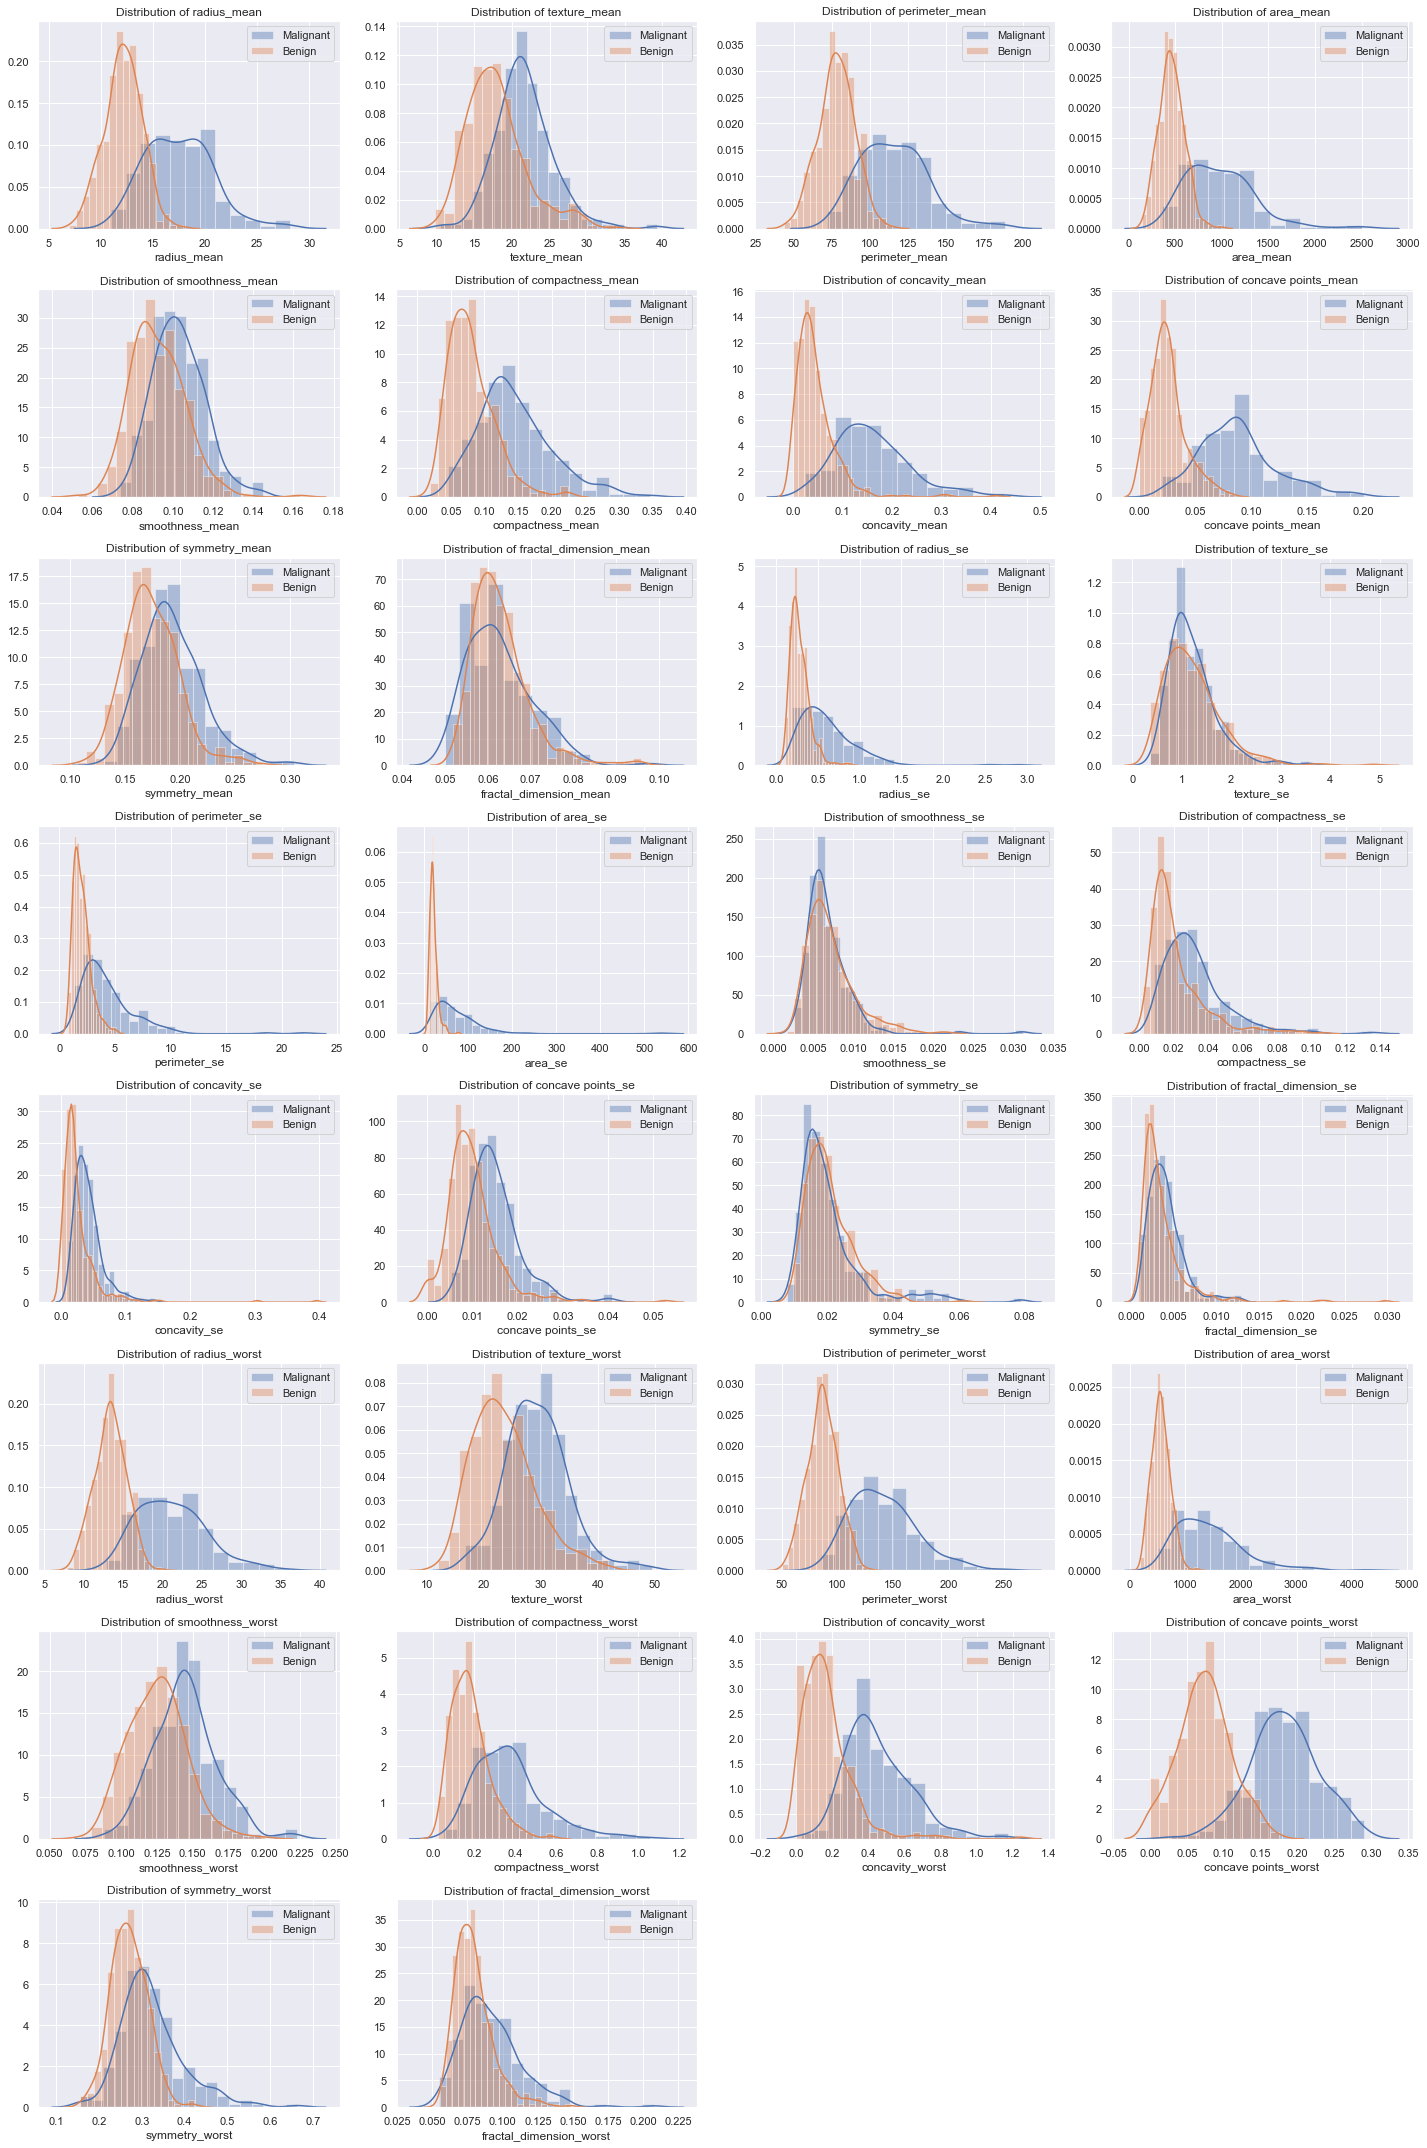

In [9]:
#plot the distributions for features in different classes 
M=df[df.target==1]
B=df[df.target==0]

plt.figure(figsize=(20,30))
for i in range(1,len(M.columns)-1):
    plt.subplot(8,4,i)
    sns.distplot(M[M.columns[i]],label='Malignant')
    sns.distplot(B[B.columns[i]],label="Benign")
    plt.title('Distribution of {}'.format(M.columns[i]))
    plt.legend(loc='best')
plt.tight_layout()
plt.show()

### Target 

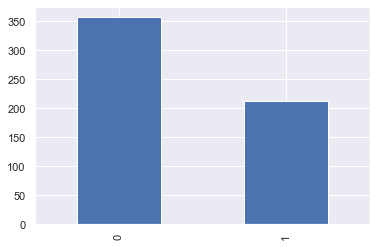

In [12]:
df.target.value_counts().plot(kind='bar')
# We can see that class 0 and class 1 are not balanced! So we can apply oversampling method. 

# Train test split


In [13]:
# declare inputs and target
inputs=df.drop(columns=['id','target'])
target=df.target

In [14]:
# Import the module for the split
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
# To have the same split as mine, use random_state = 365
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=365)

#check the shape of the results
print("Training set - Features: ", x_train.shape, "Target: ", y_train.shape)
print("Test set- Features: ", x_test.shape, "Target: ",y_test.shape)

Training set - Features:  (455, 30) Target:  (455,)
Test set- Features:  (114, 30) Target:  (114,)


# Data standardization¶


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  
scaler.fit(x_train)

X_train = scaler.transform(x_train)  
X_test = scaler.transform(x_test)

In [16]:
#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Test set- Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (455, 30) Target:  (455,)
Test set- Features:  (114, 30) Target:  (114,)


# Feature selection


In [17]:
feature_columns=inputs.columns
x_train =pd.DataFrame(data=X_train, columns=inputs.columns)
x_test =pd.DataFrame(data=X_test, columns=inputs.columns)

print("Training set - Features: ", x_train.shape, "Target: ", y_train.shape)
print("Test set- Features: ", x_test.shape, "Target: ",y_test.shape)

Training set - Features:  (455, 30) Target:  (455,)
Test set- Features:  (114, 30) Target:  (114,)


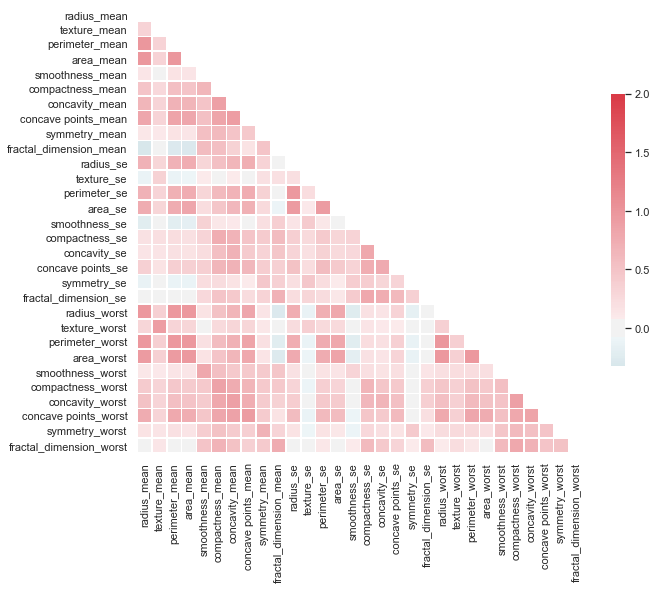

In [18]:
sns.set(style="white")

# Compute the correlation matrix
corr = x_train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=2, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink":.5})
plt.show()

In [19]:
corr_matrix = x_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
x_train.drop(columns=to_drop, inplace=True)
x_test.drop(columns=to_drop, inplace=True)

In [20]:
x_train.shape

(455, 24)

In [119]:
to_drop 

['perimeter_mean',
 'area_mean',
 'perimeter_se',
 'radius_worst',
 'perimeter_worst',
 'area_worst']

# Upsamlpling 

In [21]:
from sklearn.utils import resample
# concatenate our training data back together
training  = pd.DataFrame()
training[x_train.columns]=x_train
training['target']=list(y_train)
# separate minority and majority classes
MM= training[training.target==1]# minority 
BB= training[training.target==0]# majority

MM_upsampled = resample(MM,
                          replace=True, # sample with replacement
                          n_samples=len(BB), # match number in majority class
                          random_state=23) # reproducible results



upsampled= pd.concat([BB,MM_upsampled])
upsampled.target.value_counts()

y_train = upsampled.target
x_train = upsampled.drop('target', axis=1)

In [22]:
y_train.shape,x_train.shape

((580,), (580, 24))

In [23]:
y_test.shape,x_test.shape

((114,), (114, 24))

# Modeling

## Random Forest 

### GridSearch

In [82]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score

# given prameters different values
# given prameters different values
random_grid={
             'n_estimators':list(range(220,240)),
             'max_depth':list(range(1,30,2)),
             'max_features':list(range(1,19)),
             'min_samples_leaf':list(range(1,19)),
             'min_samples_split':list(range(1,19))                   
                            
                                
            }

In [83]:
# random forest model
rfc=RandomForestClassifier(
                            
                             random_state=666
                             
    
)

In [84]:
# randommized searchCV
RS=RandomizedSearchCV(rfc,random_grid,cv=10)

In [85]:
# fit the train data
RS.fit(x_train,y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [86]:
RS.best_params_,RS.best_score_

({'n_estimators': 222,
  'min_samples_split': 2,
  'min_samples_leaf': 3,
  'max_features': 12,
  'max_depth': 25},
 0.9810344827586208)

### Random Forest model with best parameters


In [32]:
rfc=RandomForestClassifier(
    n_estimators=RS.best_params_["n_estimators"],
 min_samples_split= RS.best_params_["min_samples_split"],
 min_samples_leaf= RS.best_params_["min_samples_leaf"],
 max_features= RS.best_params_["max_features"],
 max_depth= RS.best_params_["max_depth"],
 n_jobs=-1,
 random_state=42)

In [28]:
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=12,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=16,
                       min_weight_fraction_leaf=0.0, n_estimators=234,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [29]:
# let us take a look at the results
print('Accuracy score of train data :{}'.format(rfc.score(x_train,y_train)))
print('Accuracy score of test data:{}'.format(rfc.score(x_test,y_test)))
# obtian train data f1_Score
pre_train=rfc.predict(x_train)
print('Train data f1_Score:{}'.format(f1_score(y_train, pre_train,average='weighted')))
# Obtain Test data f1_Score
y_pred=rfc.predict(x_test)
print('Test data f1_Score:{}'.format(f1_score(y_test, y_pred,average='weighted')))

Accuracy score of train data :0.9758620689655172
Accuracy score of test data:0.9210526315789473
Train data f1_Score:0.9758574758574758
Test data f1_Score:0.9206156885757346


In [30]:
# function of  plot_confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix, without normalization
[[64  3]
 [ 6 41]]


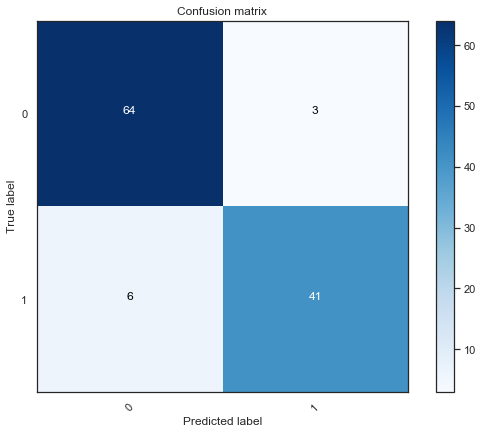

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
cm = confusion_matrix(y_test, y_pred)
classes = ['0','1']
plt.figure(figsize=(8,6))
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

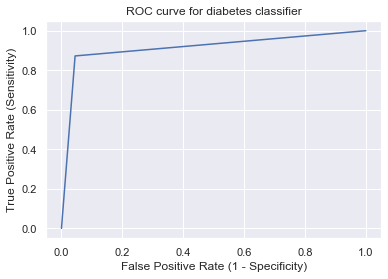

In [40]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
sns.lineplot(fpr, tpr)
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

## Logistic Regression

In [56]:
#import Logistic Regression
from sklearn.linear_model import LogisticRegression

def Logistic_Regression(x_train, y_train,x_test, y_test):
    log_re = LogisticRegression()#max_iter=1000
    log_re.fit(x_train, y_train)
    #calculate scores for test data and train data 
    test_data_score = log_re.score(x_test, y_test)
    train_data_score = log_re.score(x_train, y_train)
    print("Train data score:{}".format(train_data_score ))
    print("Test data score:{}".format(test_data_score ))
    # predict values for test data and train data
    log_y_test_pre=log_re.predict(x_test)
    log_y_train_pre=log_re.predict(x_train)
    # calculate f1 scores for test data and train data 
    log_f1_score_test=f1_score(y_test,log_y_test_pre)
    log_f1_score_train=f1_score(y_train,log_y_train_pre)

    print("Train data f1 score:{}".format(log_f1_score_train))
    print("Test data f1 score:{}".format(log_f1_score_test ))
    return log_y_train_pre,log_y_test_pre

In [58]:
log_y_train_prec,log_y_test_prec=Logistic_Regression(x_train, y_train,x_test, y_test)

Train data score:0.9913793103448276
Test data score:0.9473684210526315
Train data f1 score:0.9913941480206541
Test data f1 score:0.9375000000000001


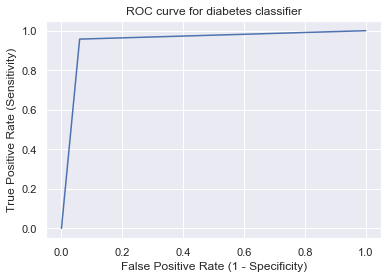

In [117]:
fp_log, tp_log, thresholds_log = metrics.roc_curve(y_test, log_y_test_prec)
sns.lineplot(fp_log, tp_log)
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

## Neural Network

In [59]:
# thanks to :https://realpython.com/python-keras-text-classification/
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.optimizers import Adam, SGD
import tensorflow as tf

Using TensorFlow backend.


In [111]:
import random
def history_model(X_train, y_train,X_test, y_test):
    #Before we build our model, we need to know the input dimension of our feature vectors.
    input_dim = X_train.shape[1] 
    # Add layers one by one in order 
    random.seed(123)
    model = Sequential()
    model.add(keras.layers.Dense(30, input_dim=input_dim, activation='relu'))
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    #specify the optimizer and the loss function.
    model.compile(loss='binary_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])

    #Give an overview of the model and the number of parameters available for training:
    model.summary()
    # # fit the model
    history = model.fit(X_train, y_train,epochs=100, verbose=1,
                    validation_data=(X_test, y_test),batch_size=50)
    return history, model

In [112]:
def nn_result_prediction(X_train, y_train,X_test, y_test,model):
    # obtian Accuracies for train data and test data
    loss1, accuracy1 = model.evaluate(X_train, y_train, verbose=False)
    print("Training Accuracy: {:.4f}".format(accuracy1))
    loss2, accuracy2 = model.evaluate(X_test, y_test, verbose=False)
    print("Testing Accuracy:  {:.4f}".format(accuracy2))
    #prediction
    nn_train_pre=model.predict_classes(X_train)
    nn_test_pre=model.predict_classes(X_test)

    # calculate f1 scores for test data and train data 
    nn_f1_score_test=f1_score(y_test,nn_test_pre)
    nn_f1_score_train=f1_score(y_train,nn_train_pre)

    print("Train data f1 score:{}".format(nn_f1_score_train))
    print("Test data f1 score:{}".format(nn_f1_score_test ))
    return nn_train_pre,nn_test_pre

In [113]:
history, model=history_model(x_train, y_train,x_test, y_test)


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 30)                750       
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 31        
Total params: 781
Trainable params: 781
Non-trainable params: 0
_________________________________________________________________
Train on 580 samples, validate on 114 samples
Epoch 1/100
580/580 [==============================] - 0s 284us/step - loss: 0.4263 - accuracy: 0.8431 - val_loss: 0.4115 - val_accuracy: 0.8947
Epoch 2/100
580/580 [==============================] - 0s 59us/step - loss: 0.3407 - accuracy: 0.8983 - val_loss: 0.3474 - val_accuracy: 0.9211
Epoch 3/100
580/580 [==============================] - 0s 68us/step - loss: 0.2837 - accuracy: 0.9276 - val_loss: 0.3046 - val_accuracy: 0.9211
Epoch 4/100
580/580 [==================

Epoch 53/100
580/580 [==============================] - 0s 56us/step - loss: 0.0267 - accuracy: 0.9966 - val_loss: 0.1445 - val_accuracy: 0.9474
Epoch 54/100
580/580 [==============================] - 0s 73us/step - loss: 0.0259 - accuracy: 0.9966 - val_loss: 0.1443 - val_accuracy: 0.9474
Epoch 55/100
580/580 [==============================] - 0s 61us/step - loss: 0.0253 - accuracy: 0.9966 - val_loss: 0.1444 - val_accuracy: 0.9474
Epoch 56/100
580/580 [==============================] - 0s 77us/step - loss: 0.0247 - accuracy: 0.9966 - val_loss: 0.1440 - val_accuracy: 0.9474
Epoch 57/100
580/580 [==============================] - 0s 62us/step - loss: 0.0242 - accuracy: 0.9966 - val_loss: 0.1442 - val_accuracy: 0.9474
Epoch 58/100
580/580 [==============================] - 0s 73us/step - loss: 0.0237 - accuracy: 0.9966 - val_loss: 0.1441 - val_accuracy: 0.9474
Epoch 59/100
580/580 [==============================] - 0s 68us/step - loss: 0.0231 - accuracy: 0.9966 - val_loss: 0.1445 - val_ac

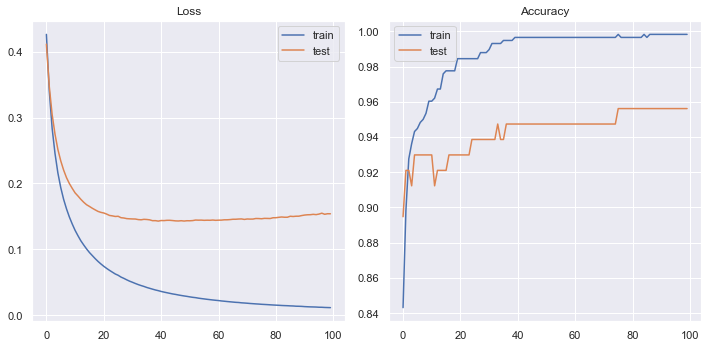

In [114]:
# plot loss during training
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# plot accuracy during training
plt.subplot(122)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.tight_layout()
plt.show()

In [115]:
nn_train_pre,nn_test_pre=nn_result_prediction(x_train, y_train,x_test, y_test,model)

Training Accuracy: 0.9983
Testing Accuracy:  0.9561
Train data f1 score:0.9982788296041308
Test data f1 score:0.9473684210526315


Confusion Matrix, without normalization
[[64  3]
 [ 2 45]]


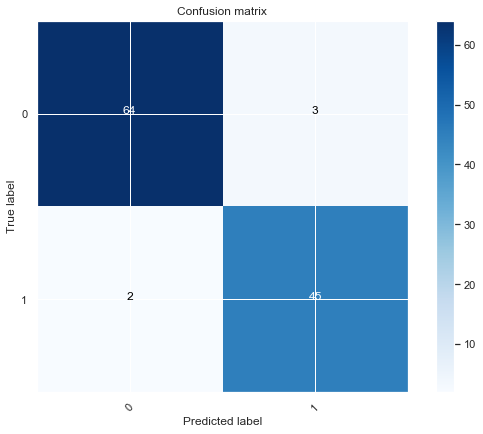

In [116]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

plt.figure(figsize=(8,6))
plot_confusion_matrix(confusion_matrix(y_test, nn_test_pre), classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

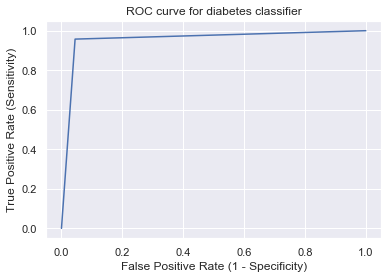

In [118]:
fp_log, tp_log, thresholds_log = metrics.roc_curve(y_test, nn_test_pre)
sns.lineplot(fp_log, tp_log)
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)